## Part A: KNN on Iris Dataset

### Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

### Load the Iris Dataset

In [9]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Create DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
# Show first 10 rows
print(df.head(10))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


### Normalize the Data (Min-Max Scaling)

In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:10, :])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


### Split Train/Test Sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Train KNN Classifier (k=3)

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluate Model (Accuracy + Confusion Matrix)

Predictions: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 1 1 0 2 0]
True labels: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Accuracy: 0.9666666666666667


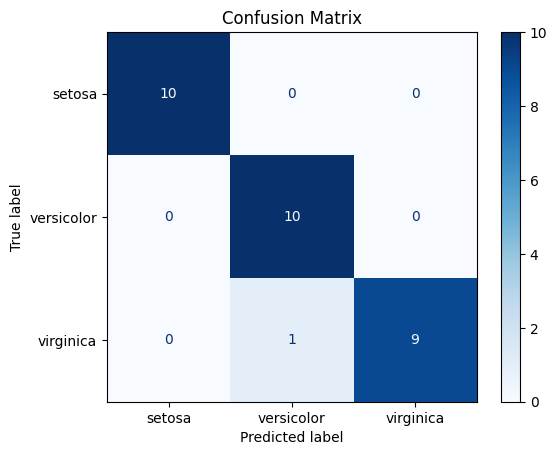

In [13]:
y_pred = knn.predict(X_test)
print("Predictions:", y_pred)
print("True labels:", y_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### PCA Visualization of Data

PCA components shape: (150, 2)


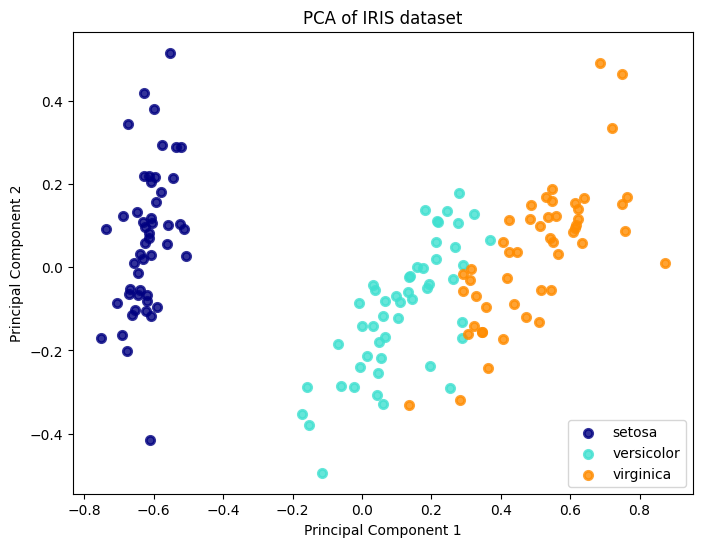

In [14]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)
print("PCA components shape:", x_pca.shape)
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()
# Save the PCA transformed data
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y
# Save to CSV
pca_df.to_csv('iris_pca.csv', index=False)

**Why Can the Iris Dataset Be Used with KNN?**

The aim of applying KNN to the Iris dataset in this context is to classify the labels. Specifically, the goal is to predict the species of an Iris flower (labels: setosa, versicolor, virginica) based on its features (e.g., sepal length, sepal width, petal length, petal width).

1. **Low Dimensionality**
   The dataset has only 4 features: sepal length, sepal width, petal length, and petal width.
   In low-dimensional spaces, Euclidean distance—used by KNN—is meaningful and effective.

2. **Continuous Numerical Values**
   The features are continuous values (e.g., petal length = 5.1 cm), not sparse representations like word vectors, making distance computations straightforward and accurate.

3. **Clear Class Distribution**
   The three classes of iris flowers (Setosa, Versicolor, Virginica) exhibit clear clustering patterns in the feature space, so distance-based classification works well.

4. **Small Dataset Size**
   With only 150 samples in total, KNN’s computational cost for querying is low, making it efficient to use.


**Why KNN Is Not Recommended for Text Classification**

K-Nearest Neighbors (KNN) is generally not ideal for text classification due to the nature of textual data and the algorithm's limitations:

1. **High-Dimensional Sparse Data Is Not Suitable for Distance Measures**
   Text is typically represented using high-dimensional vectors like TF-IDF. For example, you might have 5,000 word features, but any single document may only contain a few dozen words.
   In such sparse, high-dimensional spaces, distance metrics like Euclidean or Manhattan distance become unreliable due to the *curse of dimensionality*—all points tend to appear equally distant.

2. **High Computational Cost**
   KNN requires calculating the distance between every test sample and all training samples, which becomes computationally expensive in both time and memory.
   In contrast, algorithms like Naive Bayes are much faster after training, as they rely on learned statistical parameters rather than storing the entire training set.

3. **No Probabilistic Interpretation**
   Naive Bayes offers interpretable outputs by modeling the probability of a document belonging to each class based on word likelihoods.
   KNN, however, acts like a black box: it simply predicts based on the closest neighbors, offering no clear explanation of why a document was classified a certain way.

4. **Sensitive to Noise**
   KNN is vulnerable to outliers. If a document happens to have noisy or misleading neighbors in the feature space, the classification result can be incorrect.

**Summary**:
While KNN is simple and intuitive, it struggles with the sparsity, dimensionality, and scale of typical text datasets, making it less suitable compared to more robust methods like Naive Bayes, Logistic Regression, or modern deep learning approaches.

